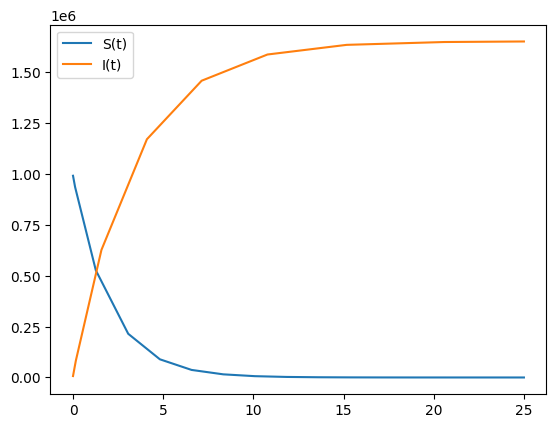

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

a = 0.5
b = 0.3
n = 1000000
s0 = 990000
i0 = 7000
r0 = 3000
t0, tf = 0, 25

def dsdt(t, s):
    return -a * s

def didt(t, i):
    return a * s0 - b * i

soln = solve_ivp(dsdt, (t0, tf), [s0])
t1, s = soln.t, soln.y[0]
plt.plot(t1, s, label='S(t)')

soln = solve_ivp(didt, (t0, tf), [i0])
t2, i = soln.t, soln.y[0]
plt.plot(t2, i, label='I(t)', )

plt.legend()
plt.show()


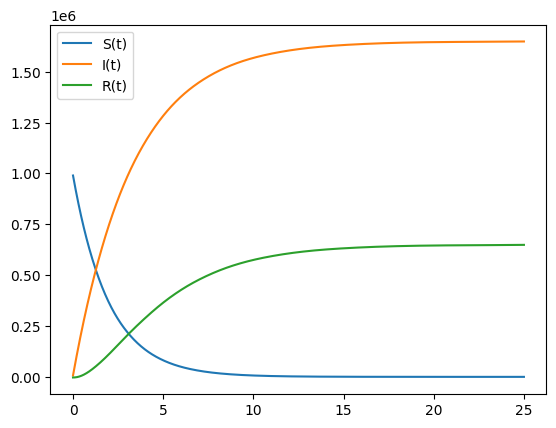

In [40]:
t3 = np.linspace(0, 25, 1000)
s_t = interp1d(t1, s, kind='cubic')
i_t = interp1d(t2, i, kind='cubic')
plt.plot(t3, s_t(t3), label='S(t)')
plt.plot(t3, i_t(t3), label='I(t)')
plt.plot(t3, i_t(t3) + s_t(t3) - n, label='R(t)')
plt.legend()
plt.show()